In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import rebound

c1 = '#990099'
c2 = '#4d0099'
c3 = '#009900'

%matplotlib inline

# Obtención de los datos

In [2]:
""" Estrella cuyo sistema planetario analizarán """

Estrella = b'HR 8799'

# Constantes útiles

mJupiter = 9.55*10**-4
rads = np.pi/180.

In [3]:
"""Esta función lee los datos requeridos
El valor N se toma según el dato requerido. En la siguiente celda
están los datos que pueden recuperarse.
"""

def lectura(N):
    datos = np.genfromtxt('TablaExoplanetas.dat', names=True, dtype=None, skip_header=1, delimiter = '\t')  # Lee la tabla
    lista = []                    # Array vacío para llenarlo con los datos
    for i in range(0,len(datos)):
        renglon = datos[i]        # Revisa cada renglon
        lista.append(renglon[N])  # Añade a lista la variable N del renglón i 
    return lista

0.	name
1.	planet_status
2.	mass	
3.	mass_error_min	
4.	mass_error_max	
5.	mass_sini	
6.	mass_sini_error_min	
7.	mass_sini_error_max	
8.	radius	
9.	radius_error_min	
10.	radius_error_max	
11.	orbital_period	
12.	orbital_period_error_min	
13.	orbital_period_error_max	
14.	semi_major_axis	
15.	semi_major_axis_error_min	
16.	semi_major_axis_error_max	
17.	eccentricity
18.	eccentricity_error_min
19.	eccentricity_error_max	
20.	inclination
21.	inclination_error_min
22.	inclination_error_max
23.	angular_distance
24.	discovered
25.	updated	
26.	omega	
27.	omega_error_min	
28.	omega_error_max	
29.	tperi
30.	tperi_error_min
31.	tperi_error_max
32.	tconj
33.	tconj_error_min
34.	tconj_error_max
35.	tzero_tr
36.	tzero_tr_error_min
37.	tzero_tr_error_max
38.	tzero_tr_sec
39.	tzero_tr_sec_error_min
40.	tzero_tr_sec_error_max
41.	lambda_angle
42.	lambda_angle_error_min
43.	lambda_angle_error_max
44.	impact_parameter
45.	impact_parameter_error_min
46.	impact_parameter_error_max
47.	tzero_vr
48.	tzero_vr_error_min
49.	tzero_vr_error_max
50.	k
51.	k_error_min
52.	k_error_max	
53.	temp_calculated	
54.	temp_calculated_error_min	
55.	temp_calculated_error_max	
56.	temp_measured	
57.	hot_point_lon	
58.	geometric_albedo
59.	geometric_albedo_error_min
60.	geometric_albedo_error_max
61.	log_g
62.	publication
63.	detection_type
64.	mass_detection_type
65.	radius_detection_type
66.	alternate_names	
67. molecules
68.	star_name
69.	ra
70.	dec
71.	mag_v
72.	mag_i
73.	mag_j
74.	mag_h
75.	mag_k
76.	star_distance
77.	star_distance_error_min
78.	star_distance_error_max
79.	star_metallicity
80.	star_metallicity_error_min
81.	star_metallicity_error_max
82.	star_mass
83.	star_mass_error_min
84.	star_mass_error_max
85.	star_radius	
86.	star_radius_error_min
87.	star_radius_error_max
88.	star_sp_type
89.	star_age
90.	star_age_error_min	
91.	star_age_error_max
92.	star_teff
93.	star_teff_error_min
94.	star_teff_error_max
95.	star_detected_disc
96.	star_magnetic_field
97.	star_alternate_names

In [4]:
"""Datos que podrían servirnos"""

# Datos del planeta

name                 = lectura(0)
planet_mass          = lectura(2)
semi_major_axis      = lectura(14)
eccentricity         = lectura(17)
inclination          = lectura(20) 
omega                = lectura(26)

# Datos de la estrella
star_name            = lectura(68)
star_mass            = lectura(82)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  import sys


In [5]:
NN = len(star_name)

# Datos de los planetas
nombre        = []
masa          = []
semieje       = []
excentricidad = []
inclinacion   = []
omeguita      = []

def funcionNan(X):
    if np.isnan(X) == False:
        return X
    else:
        return 0.

for i in range(0,NN):
    if star_name[i] == Estrella:
        nombre.append(name[i])
        masa.append( funcionNan(planet_mass[i]) * mJupiter)
        semieje.append( funcionNan(semi_major_axis[i]) )
        excentricidad.append( funcionNan(eccentricity[i]) )
        inclinacion.append( funcionNan(inclination[i]) * rads)
        omeguita.append( funcionNan(omega[i]) * rads)
        masaEstrella = star_mass[i]

In [6]:
print('Sistema planetario de la estrella',Estrella,'con masa de',masaEstrella,'masas solares')
print(' ')
for i in range(0,len(nombre)):
    print('Planeta {0:>10s} con m = {1:5.2f} M_Jup, a = {2:5.2f} UA, e = {3:5.2f}, i = {4:5.4f} rad, omega = {5:5.4f} rad'.format(nombre[i], masa[i]/mJupiter, semieje[i], excentricidad[i], inclinacion[i], omeguita[i])) 
    

Sistema planetario de la estrella b'HR 8799' con masa de 1.56 masas solares
 
Planeta b'HR 8799 b' con m =  7.00 M_Jup, a = 68.00 UA, e =  0.00, i = 0.4887 rad, omega = 0.0000 rad
Planeta b'HR 8799 c' con m =  8.30 M_Jup, a = 42.90 UA, e =  0.00, i = 0.4887 rad, omega = 0.0000 rad
Planeta b'HR 8799 d' con m =  8.30 M_Jup, a = 27.00 UA, e =  0.10, i = 0.4887 rad, omega = 1.3998 rad
Planeta b'HR 8799 e' con m =  9.20 M_Jup, a = 16.40 UA, e =  0.15, i = 0.4363 rad, omega = 0.0000 rad


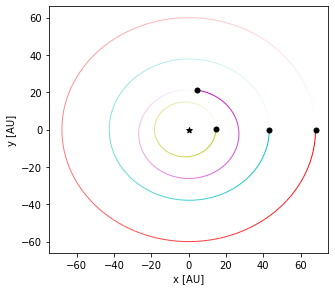

In [7]:
# Declarando la simulación
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.integrator = "whfast"
sim.dt = 0.001

# Añadiendo a la estrella
sim.add(m = masaEstrella)

# Añadiendo a los planetas
for i in range(0, len(nombre)):
    sim.add(m = masa[i], a = semieje[i], e = excentricidad[i], inc = inclinacion[i], omega = omeguita[i])

# Generando el plot
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color = True)
plt.savefig('orbit.pdf',bbox_inches='tight');

# Análisis de Titius-Bode

In [8]:
# Ordenando de menor a mayor los semiejes

print('Vieja distribución:', semieje)
Semieje = np.sort(semieje)
print('Nueva distribución:', Semieje)

# Creando el número provisional de espaciamiento

Numero  = []

for i in range(0,len(Semieje)):
    Numero.append(i+1) # Añade su lugar respecto a su estrella

print('Espaciamiento:', Numero)

Vieja distribución: [68.0, 42.9, 27.0, 16.4]
Nueva distribución: [16.4 27.  42.9 68. ]
Espaciamiento: [1, 2, 3, 4]


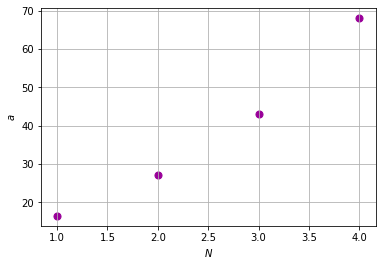

In [9]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');

In [10]:
"""Calculando el ajuste de la recta por mínimos cuadrados"""

n = len(Semieje)
i = 0
X, Y, XY, X2 = 0., 0., 0., 0.

for i in range(0,n):
    
    x = Numero[i]
    y = np.log(Semieje[i])
    
    X = X + x      # Suma de las x
    Y = Y + y      # Suma de las y
    XY = XY + x*y  # Suma de x*y
    X2 = X2 + x**2 # Suma de x^2

m = (n*XY - X*Y)/(n*X2 - X**2)    # Valor de la pendiente
b = ((X2*Y)-(XY*X))/(n*X2 - X**2) # Valor de la ordenada al origen

In [11]:
B = np.exp(b)
D = np.exp(m)

Numero_ajuste = np.linspace(0,n+1,100)

Semieje_ajuste = B * D**(Numero_ajuste)

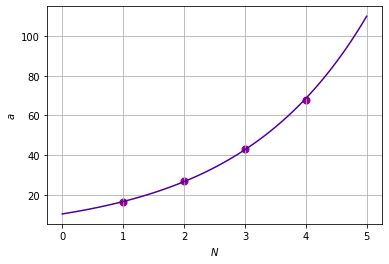

In [12]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)
ax.plot(Numero_ajuste,Semieje_ajuste, color = c2)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');

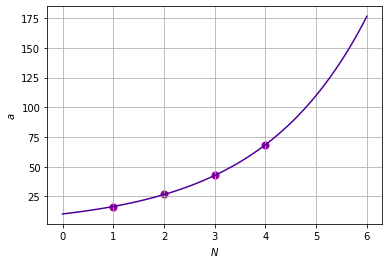

In [13]:
B = np.exp(b)
D = np.exp(m)

Numero_ajuste = np.linspace(0,n+2,100)
Semieje_ajuste = B * D**(Numero_ajuste)

fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)
ax.plot(Numero_ajuste,Semieje_ajuste, color = c2)
#ax.scatter(5, 110, color = c3, s = 50) # Propuesta

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');